# Discussion: CIFAR10 Classification with Convolutional Neural Network 

# Install Pytorch from the tutorial
https://pytorch.org/get-started/locally/#start-locally

### The code and example are adapted from the Pytorch tutorial

# Preprocess and visualize the data
### Loading the data will take 5 minutes

In [1]:
import torch
import torchvision
import numpy as np
from torchvision import datasets, models, transforms


# It will use the user agent for the entire script

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

# load the CIFAR10 data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


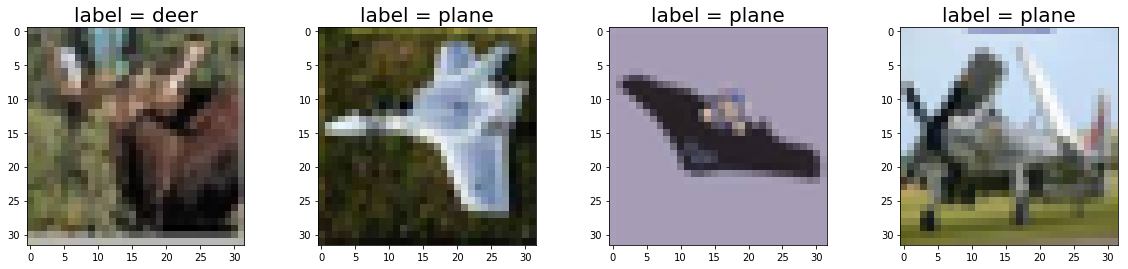

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# The CIFAR10 has more classes and data in each class than the MNIST data. 
# Therefore, it will be a harder problem to predict the data with high accuracy

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show images

# plot 4 images to visualize the data

rows = 1
columns = 4
fig = plt.figure(figsize = (20,4))
for i in range(4):
    
    plt.subplot(rows, columns, i+1)
    plt.title('label = ' + classes[labels[i]], fontsize = 20)
    
    # unnormalize the image
    img = images[i] / 2 + 0.5
    img = torchvision.transforms.ToPILImage()(img)
    plt.imshow(img)
    
plt.show()

# 1. Create the Convolutional Neural Netowrk model (3 channels) in Pytorch

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# nn is class with various functions including the Conv2d, MaxPool2d, Linear we will use in the model

# torch.nn.functional is the function API call that will be used to call the ReLU function
# so it can add in your own forward function

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # The sequence is that the first layer is a Conv2D layer with 
        # an input shape of 3 and output shape of 6 with a kernel size of 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Have a MaxPool2d layer
        
        self.pool = nn.MaxPool2d(2, 2)
        
        # The sequence is that the first layer is a Conv2D layer with 
        # an input shape of 6 and output shape of 16 with a kernel size of 5
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        # ReLU activation function
        # a simple function which allows positive values to pass through
        # whereas negative values are modified to zero 
        
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # The view function reshapes the output to match the dimensions required for the final layer.
        
        x = x.view(-1, 16 * 5 * 5)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

### The forward process will take the input shape and pass it to the first conv2d layer. Then from there, it will be feed into the maxpool2d and finally put into the ReLU activation function.  The second conv2d layer will then take the output shape from first conv2d layer and feed into the second maxpool2d and second ReLU function. After that, the input will be reshaped into (-1,16 x 5 x 5) and feed into the 3 fc layers to predict the output.

# 2. Train the model

In [5]:
import torch.optim as optim

# The class to train the model
net = Net()

# Before the training process, it is required to set up the criterion and optimizer function.

# criterion, CrossEntropyLoss. 
# optimizer, you will use the (stochastic gradient descent) SGD with a learning rate of 0.001 and a momentum of 0.9 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## The prediction loss in each iteration

In [6]:
# iterate dataset 2 times

## 1. Clear the gradients in the optimizer. The backward() function accumulates gradients, we don’t want to mix values between mini batches.
## 2. Feed the data through the convolution net. This calls the net = Net() function and gets its output.
## 3. Calculate the loss by the outputs and actual labels.
## 4. Backpropagate the gradients.
## 5. Update the parameters based on the back propagated values.

for epoch in range(20): 
    
    #set the running loss at each epoch to zero
    
    running_loss = 0.0
    
    # enumerate the train loader with starting index = 0
    # for each iteration (i) and the data (tuple of input data and labels)
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # clear the gradient
        optimizer.zero_grad()
        
        # prediction error
        
        # feed the input and acquire the output from network
        outputs = net(inputs)
        # calculating the predicted and the expected loss
        loss = criterion(outputs, labels)

        # backpropagation
        
        # compute the gradient 
        loss.backward()
        # update the parameters
        optimizer.step()

        # print statistics in each iteration
        running_loss = running_loss + loss.item()
        # print every 2000 minibatches
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Training finished')

[1,  2000] loss: 2.213
[1,  4000] loss: 1.929
[1,  6000] loss: 1.712
[1,  8000] loss: 1.595
[1, 10000] loss: 1.525
[1, 12000] loss: 1.478
[2,  2000] loss: 1.416
[2,  4000] loss: 1.391
[2,  6000] loss: 1.361
[2,  8000] loss: 1.362
[2, 10000] loss: 1.299
[2, 12000] loss: 1.284
[3,  2000] loss: 1.223
[3,  4000] loss: 1.209
[3,  6000] loss: 1.216
[3,  8000] loss: 1.189
[3, 10000] loss: 1.206
[3, 12000] loss: 1.173
[4,  2000] loss: 1.103
[4,  4000] loss: 1.114
[4,  6000] loss: 1.098
[4,  8000] loss: 1.102
[4, 10000] loss: 1.117
[4, 12000] loss: 1.091
[5,  2000] loss: 1.029
[5,  4000] loss: 1.042
[5,  6000] loss: 0.991
[5,  8000] loss: 1.037
[5, 10000] loss: 1.038
[5, 12000] loss: 1.036
[6,  2000] loss: 0.943
[6,  4000] loss: 0.963
[6,  6000] loss: 0.980
[6,  8000] loss: 0.971
[6, 10000] loss: 0.970
[6, 12000] loss: 0.972
[7,  2000] loss: 0.897
[7,  4000] loss: 0.914
[7,  6000] loss: 0.923
[7,  8000] loss: 0.924
[7, 10000] loss: 0.954
[7, 12000] loss: 0.927
[8,  2000] loss: 0.839
[8,  4000] 

### Training time will take about 20 minutes for 20 iterations. It shows that the CIFAR10 is a hard problem to train. It will increase the accuracy for 10 percent, but it takes great amount of time to achieve that.

# 3. Test the model with showing the predicted picture

Predicted:   cat  ship truck  ship


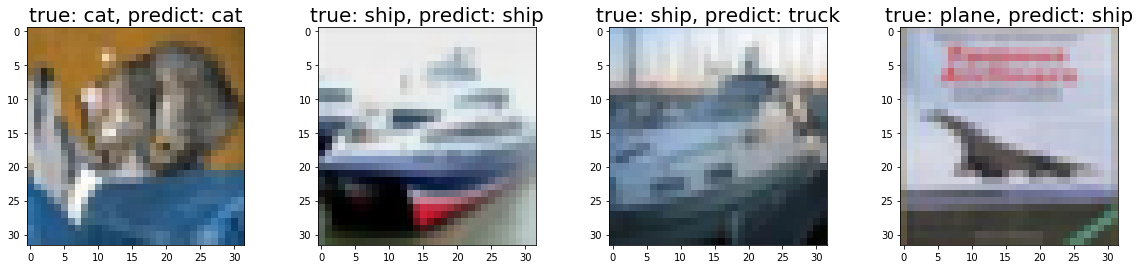

In [7]:
test_iterator = iter(test_loader)
images, labels = test_iterator.next()

results = net(images)
_, predicted = torch.max(results, 1)

print('Predicted:', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

fig2 = plt.figure(figsize = (20,4))
for i in range(4):
    plt.subplot(rows, columns, i+1)
    plt.title('true: ' + classes[labels[i]] + ', predict: ' + classes[predicted[i]], fontsize = 20)
    img = images[i] / 2 + 0.5     # this is to unnormalize the image
    img = torchvision.transforms.ToPILImage()(img)
    plt.imshow(img)
plt.show()

## Test accuracy for all classes

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 62.4 %


In [9]:
class_correct = [0. for i in range(len(classes))]
class_total = [0. for i in range(len(classes))]
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] = class_correct[label] + c[i].item()
            class_total[label] = class_total[label] + 1


for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 78 %
Accuracy of  bird : 49 %
Accuracy of   cat : 40 %
Accuracy of  deer : 64 %
Accuracy of   dog : 45 %
Accuracy of  frog : 64 %
Accuracy of horse : 68 %
Accuracy of  ship : 80 %
Accuracy of truck : 70 %
